<a href="https://colab.research.google.com/github/DHANUSHREE2001/LifeExpectancy/blob/main/Life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [ ]:
life_expectancy = pd.read_csv('https://raw.githubusercontent.com/DHANUSHREE2001/LifeExpectancy/main/Life%20Expectancy%20Data.csv')
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
life_expectancy.shape

(2938, 22)

In [ ]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

#**VISUALIZATION OF THE DATASET**

#Life expectancy country-wise

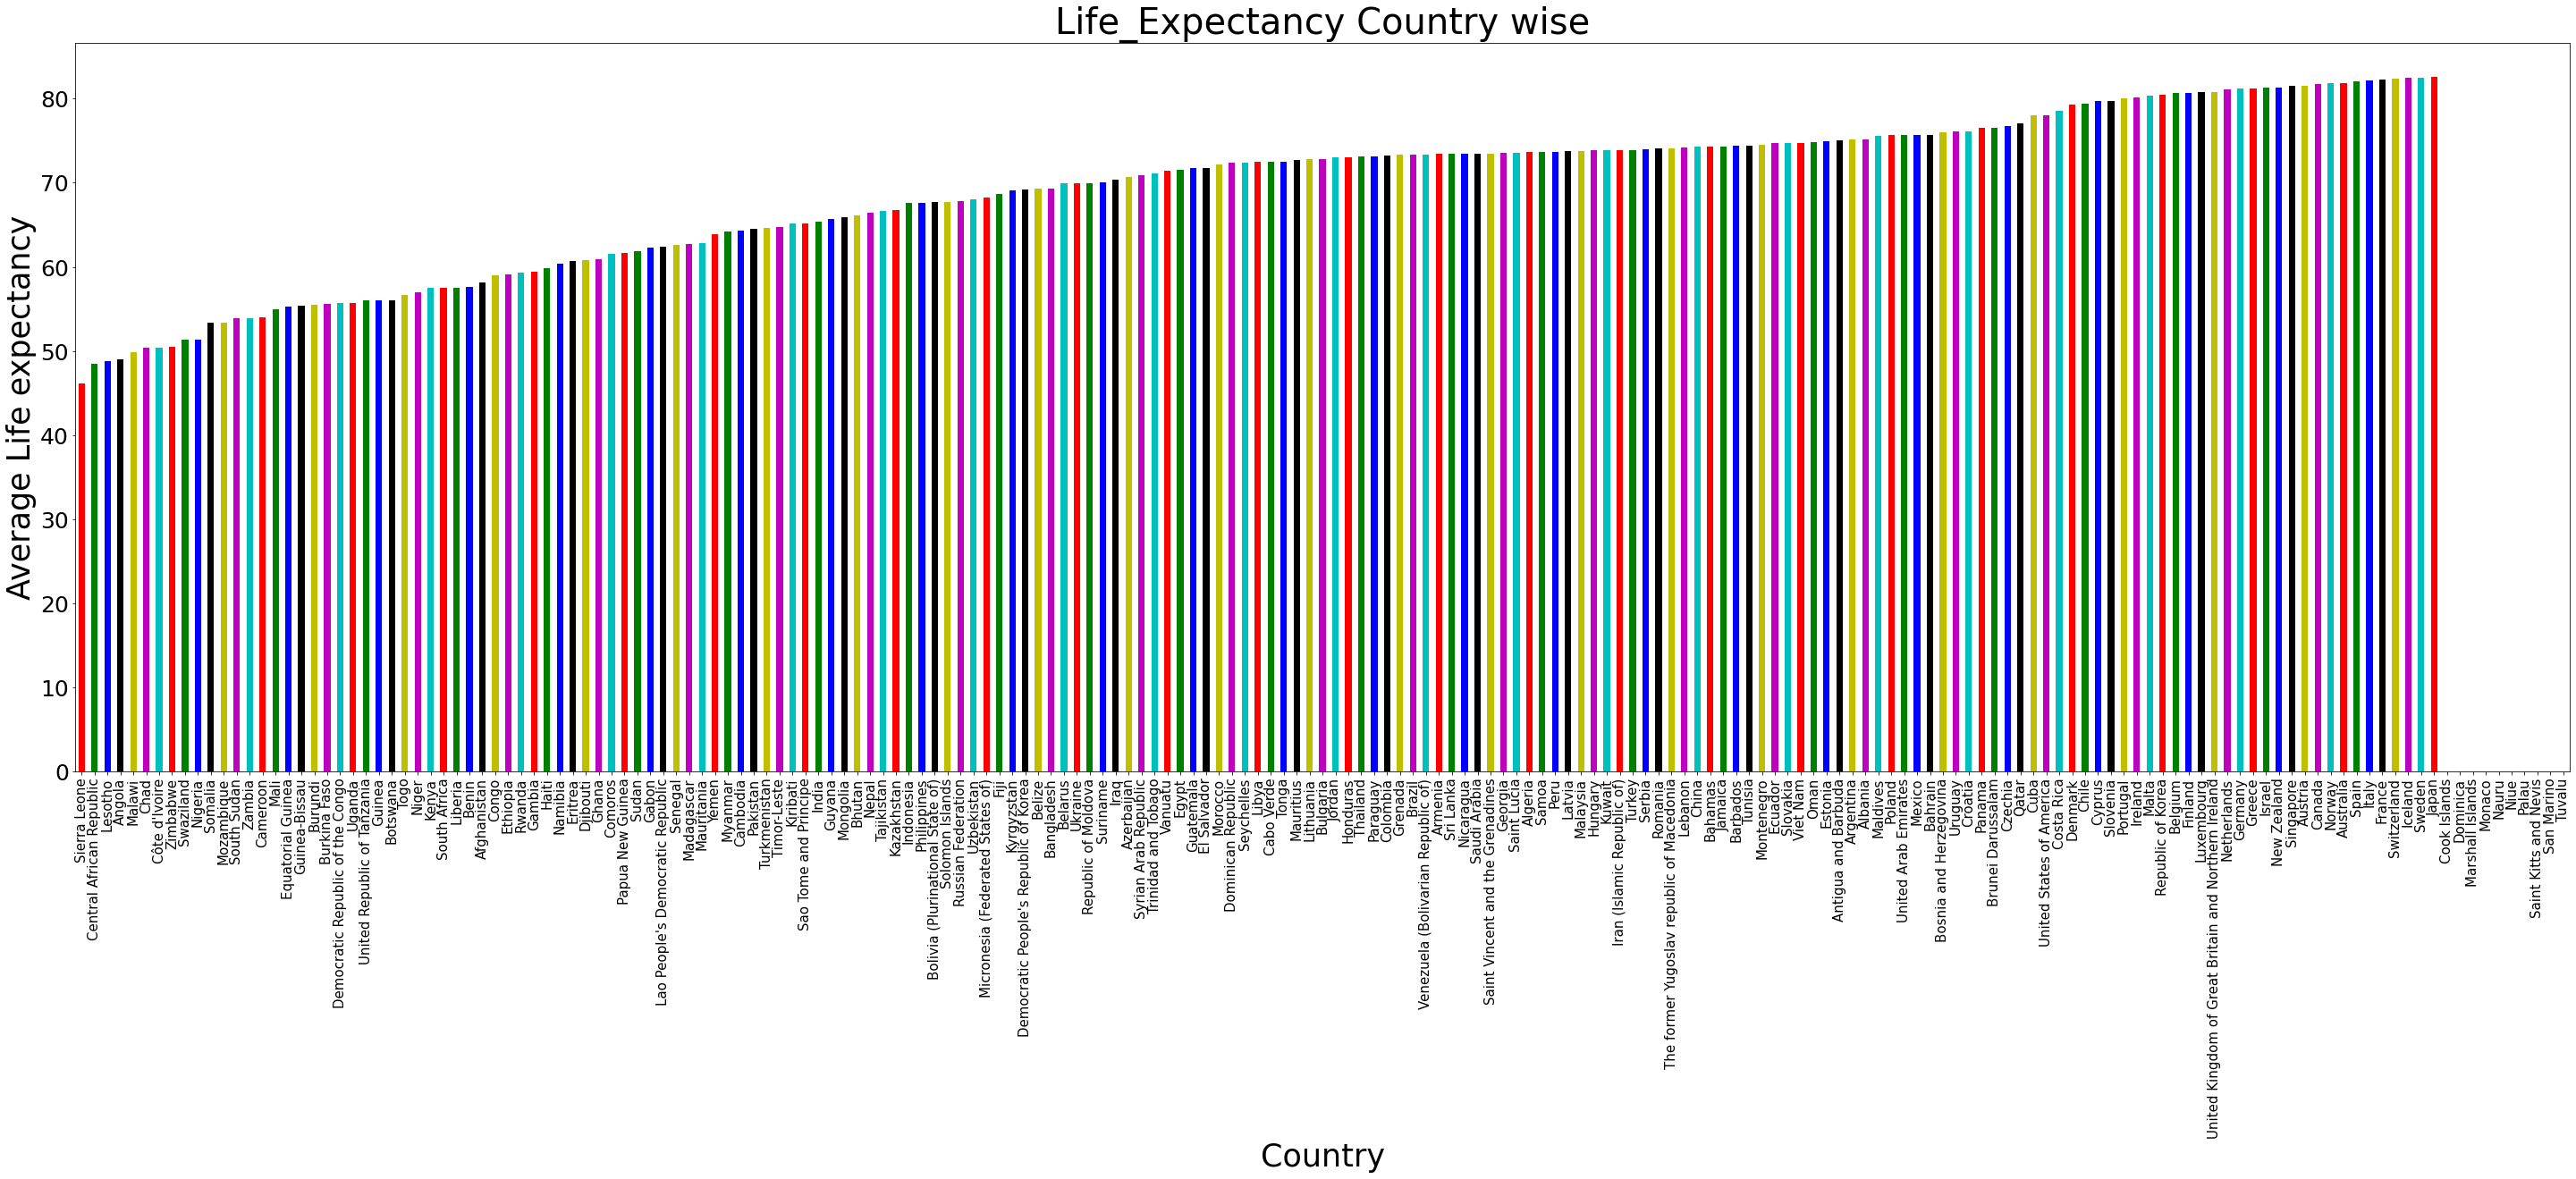

In [ ]:
life_country = life_expectancy.groupby('Country')['Life expectancy '].mean().sort_values(ascending=True)
life_country 
my_colors = list('rgbkymc')
life_country.plot(kind='bar', figsize=(50,15), fontsize=25,color=my_colors)
plt.title("Life_Expectancy Country wise",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Average Life expectancy",fontsize=35)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

          Japan is found to have higher rate of life expectancy among all other countries followed by Sweden.
          
          Sierra Leone has the lowest Life expectancy value

#Life expectancy comparison between developing and developed countries

In [ ]:
life_expectancy['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
Status_country = life_expectancy.groupby('Status')['Country','Life expectancy '];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
developing_country = Status_country.get_group('Developing')

In [ ]:
developing_country = developing_country.groupby('Country')['Life expectancy '].mean().sort_values(ascending=True)

In [ ]:
developed_country = Status_country.get_group('Developed')

In [ ]:
developed_country = developed_country.groupby('Country')['Life expectancy '].mean().sort_values(ascending=True)

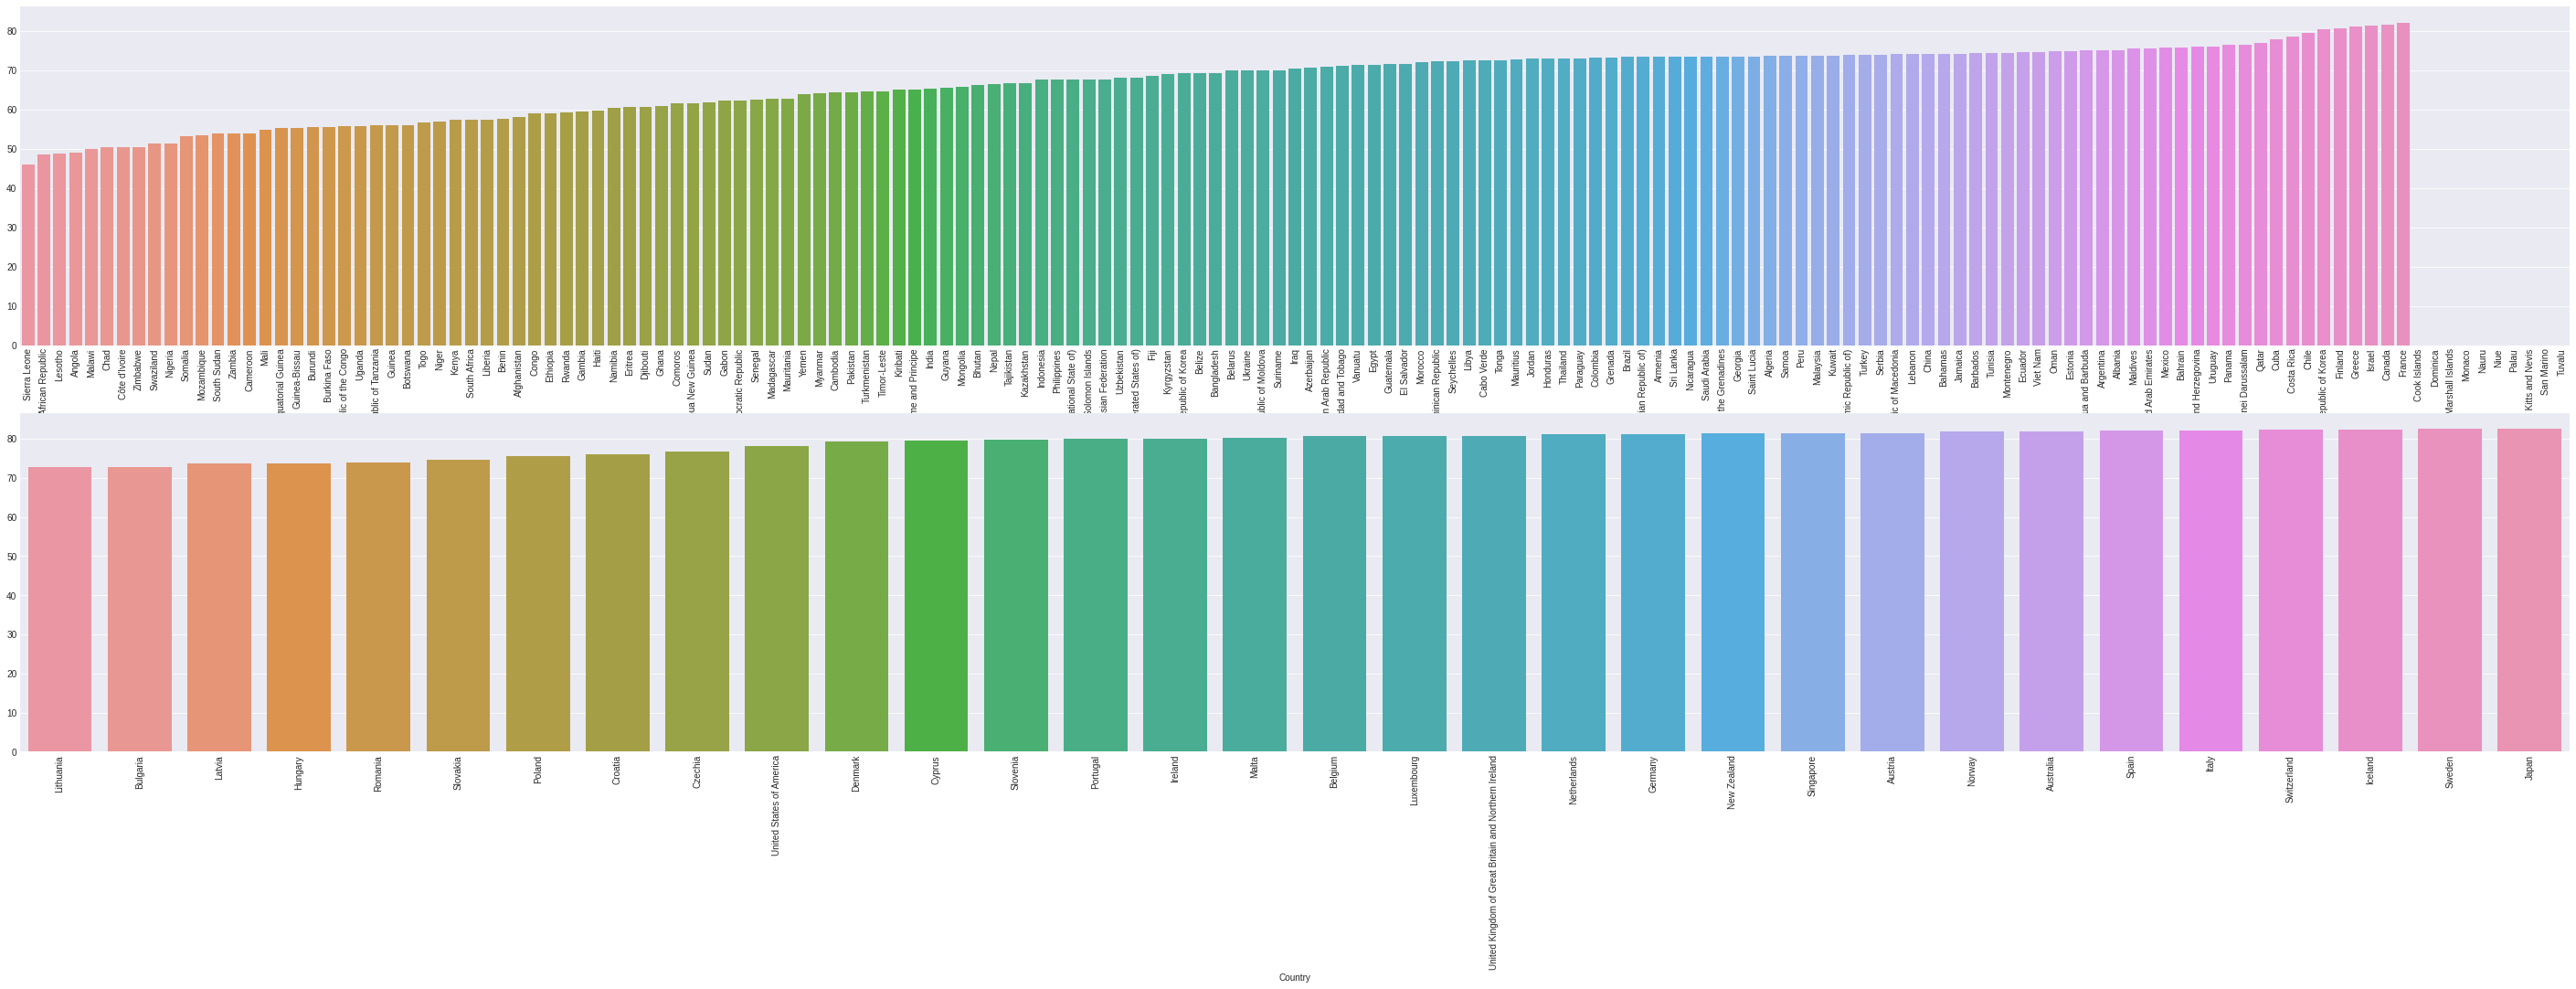

In [ ]:
plt.figure(figsize=(50,15))
plt.subplot(2,1,1)
sns.barplot(x=developing_country.index,y=developing_country.values)
plt.xticks(rotation=90);
plt.subplot(2,1,2)
sns.barplot(x=developed_country.index,y=developed_country.values)
plt.xticks(rotation=90);

        Among developing countries, France is found to have higher life expectancy average and Sierra Leone is found to have lower life expectancy average
        Among developed countries, Japan is found to have higher life expectancy average and Lithunasia is found to have lower life expectancy average


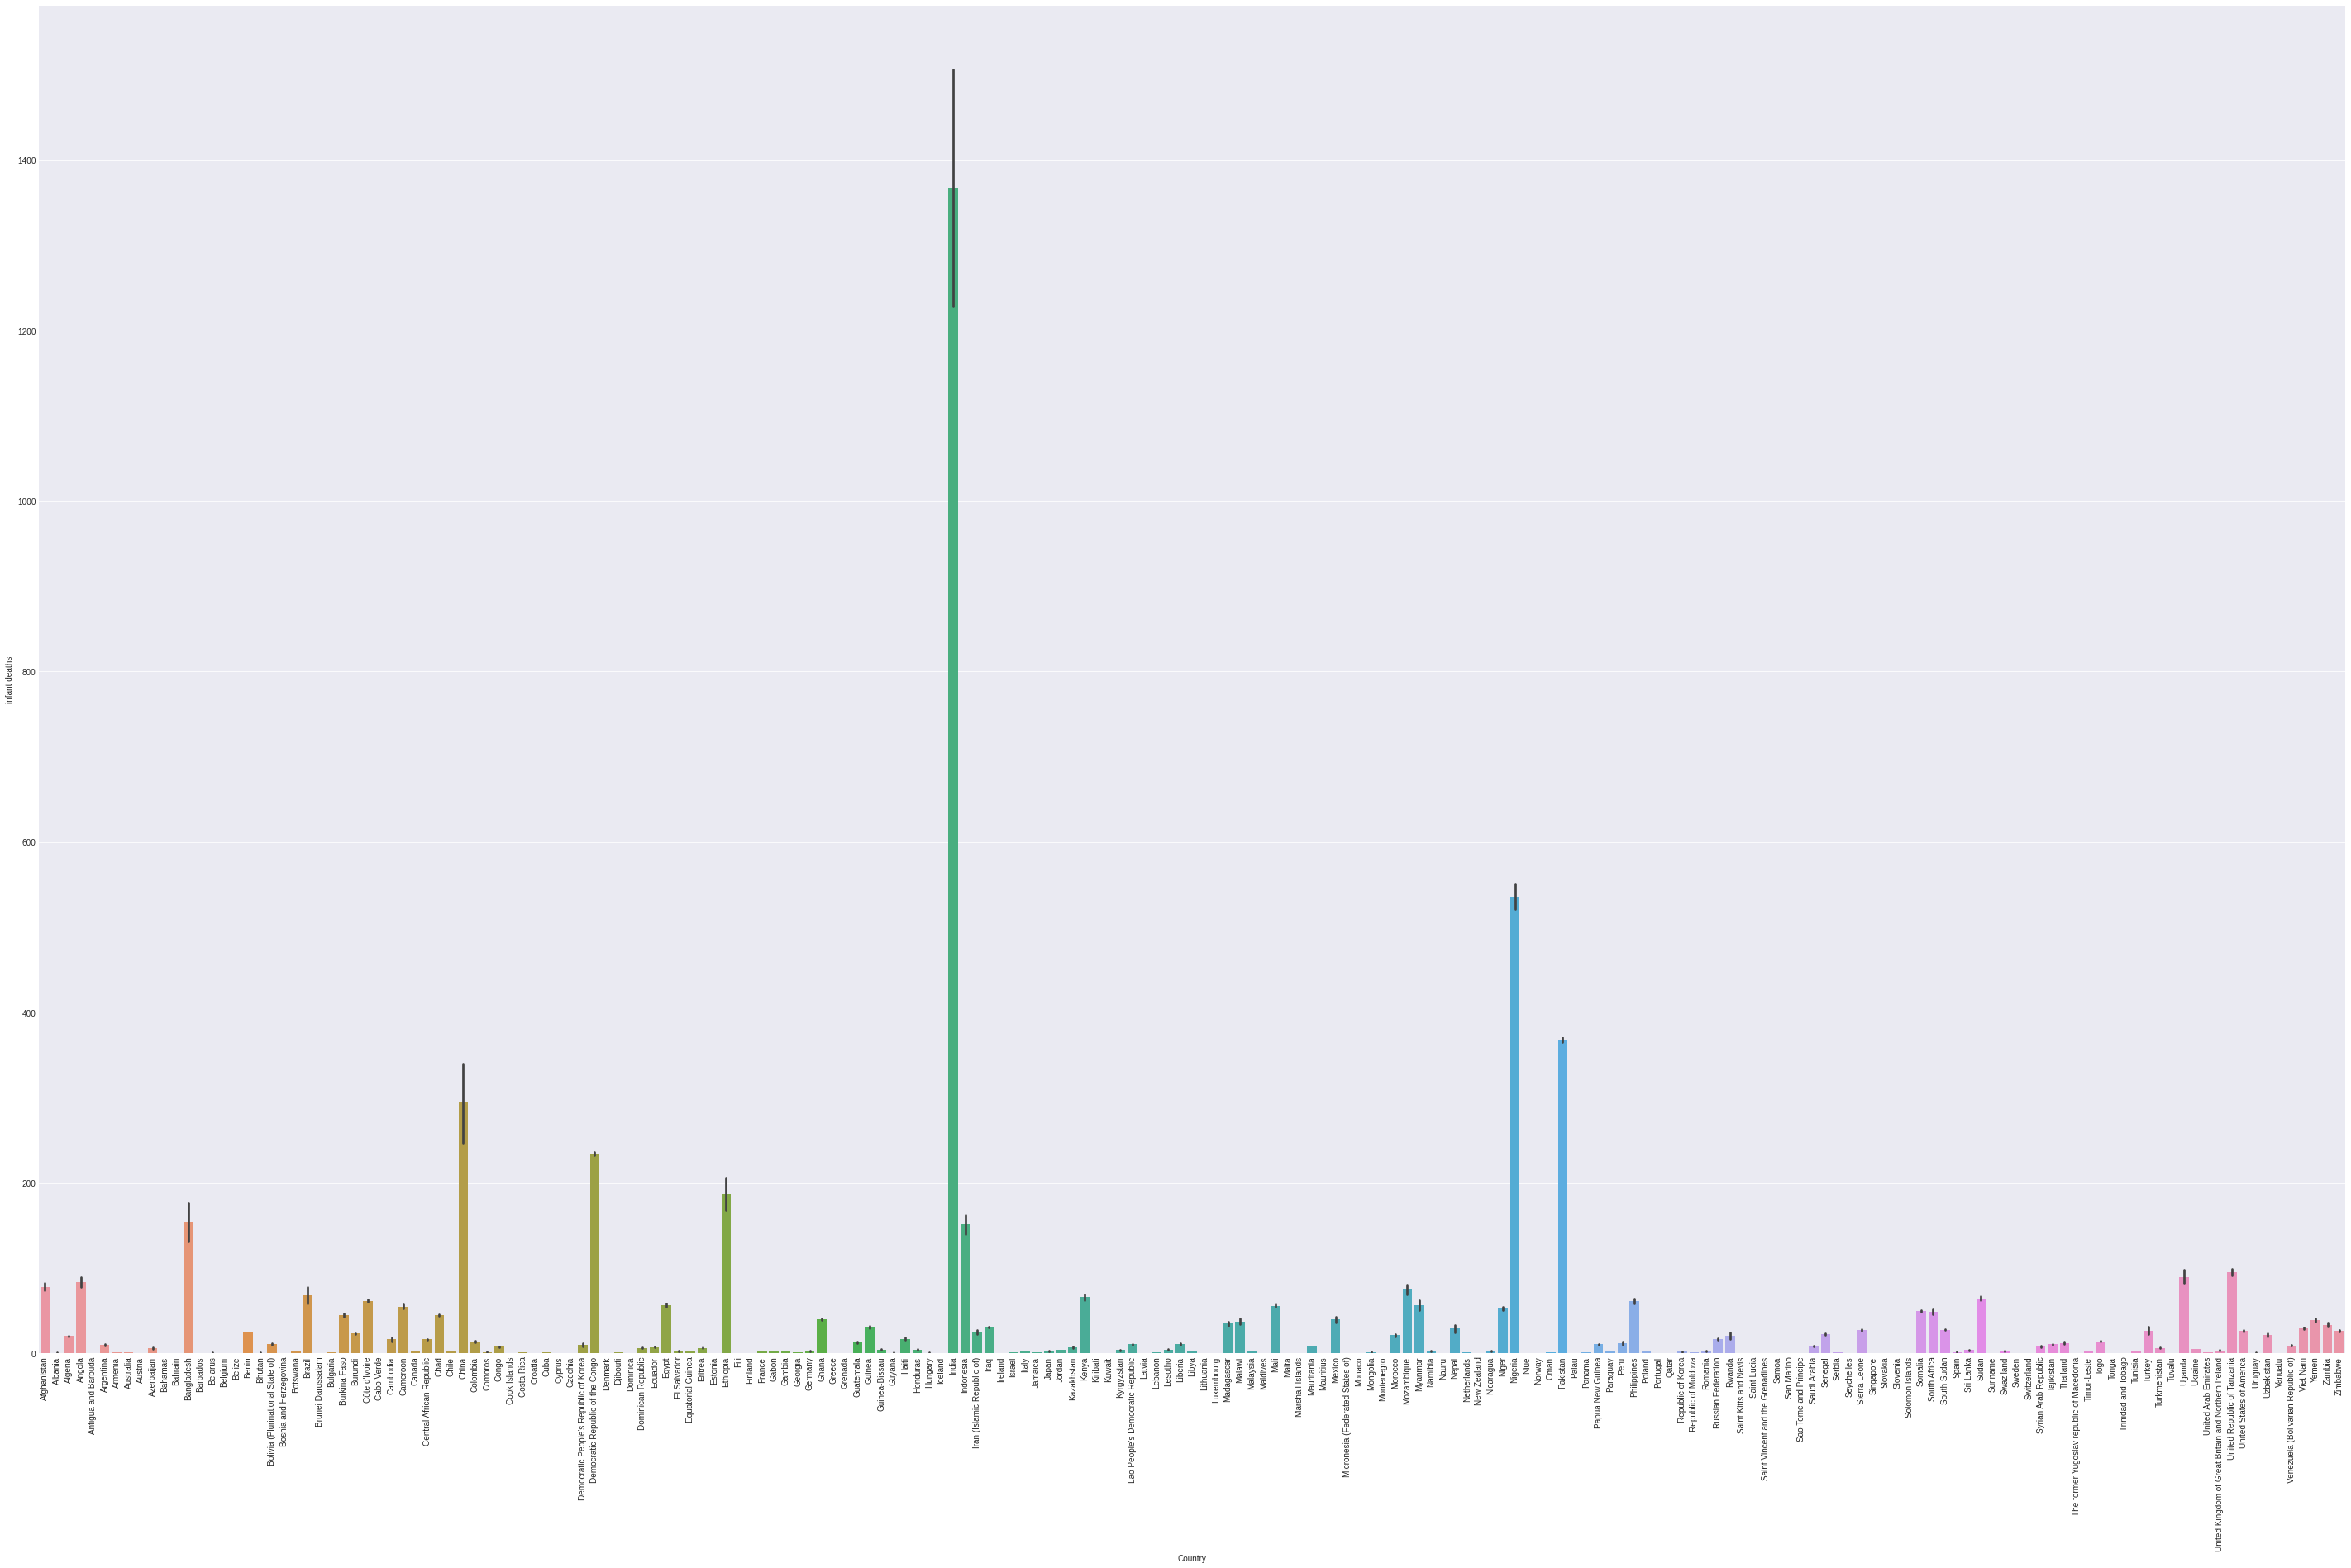

In [ ]:
plt.figure(figsize=(50,30))
sns.barplot(x='Country',y='infant deaths',data=life_expectancy);
plt.xticks(rotation=90);

          Out of all countries in the world, India is recorded to have huge average of infant deaths

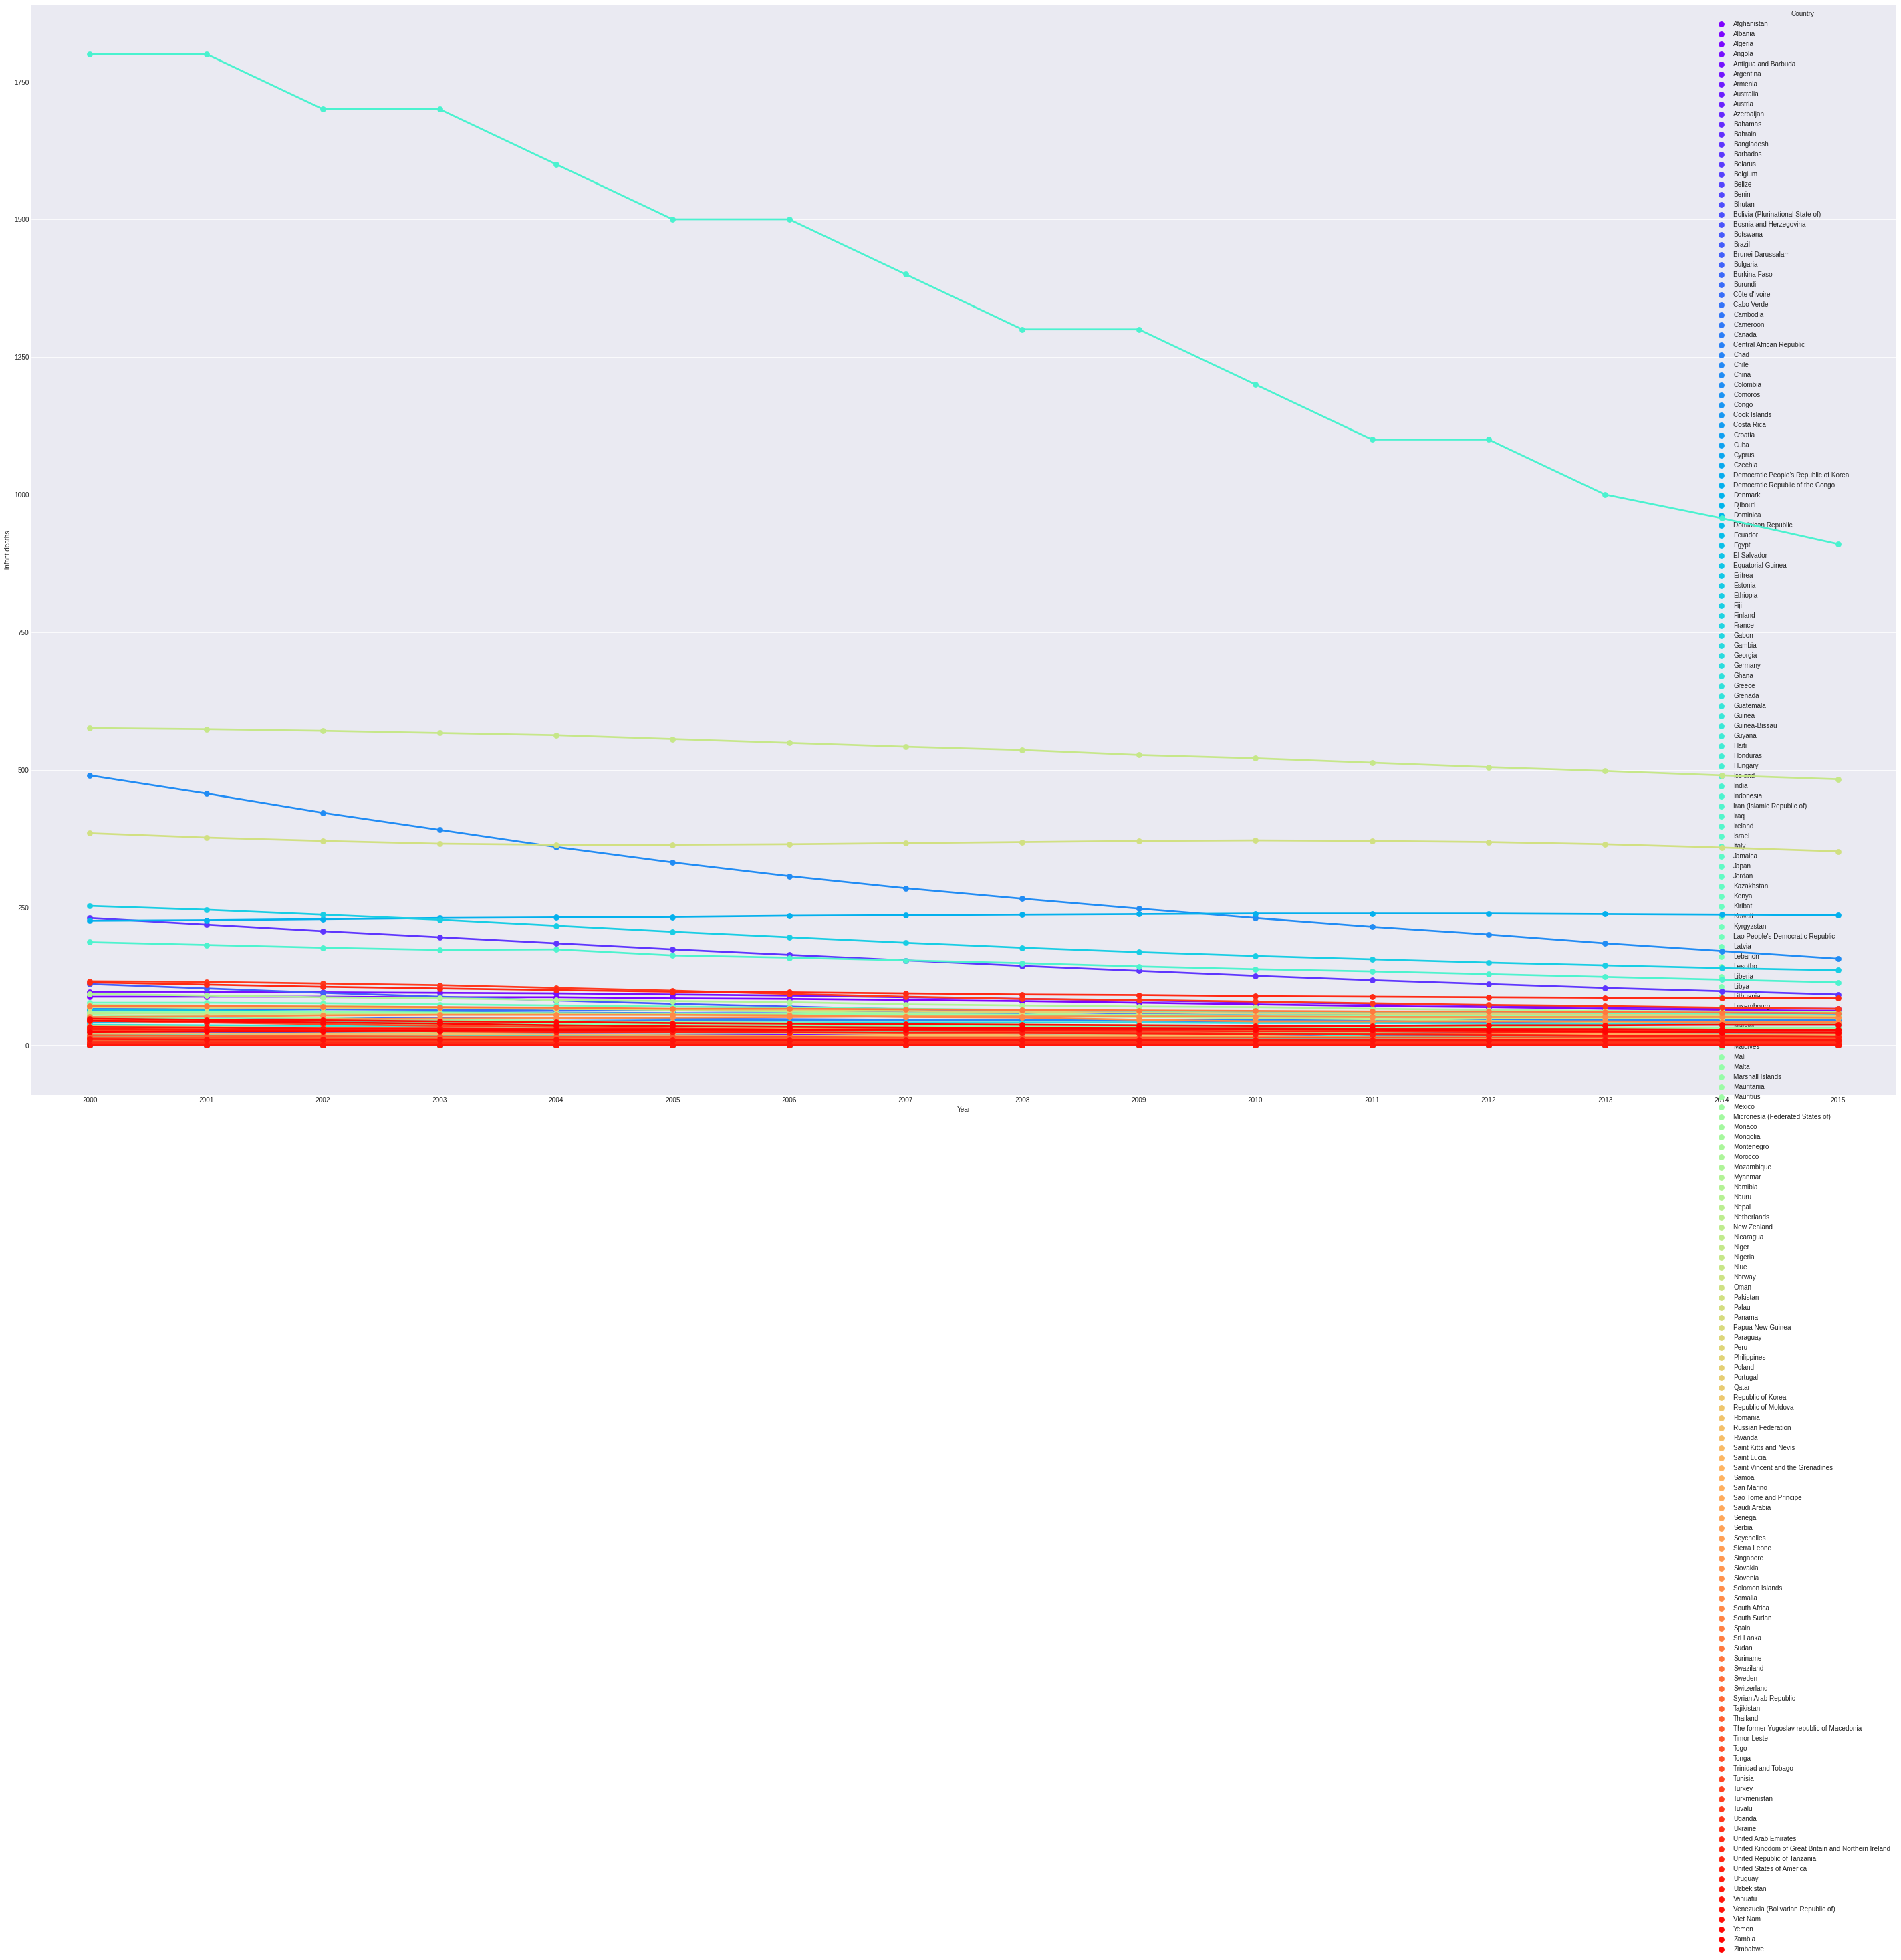

In [ ]:
plt.figure(figsize=(50,30))
sns.pointplot(x='Year',y='infant deaths',hue='Country',data=life_expectancy,palette='rainbow');

        Infant death rate almost remains same over the years for all countries except for India which though has huge rate of infant deaths compared to other countries shows significant decline in the rate over the years

# Impact of diseases on life expectancy of developing and developed countries

<Figure size 3600x2160 with 0 Axes>

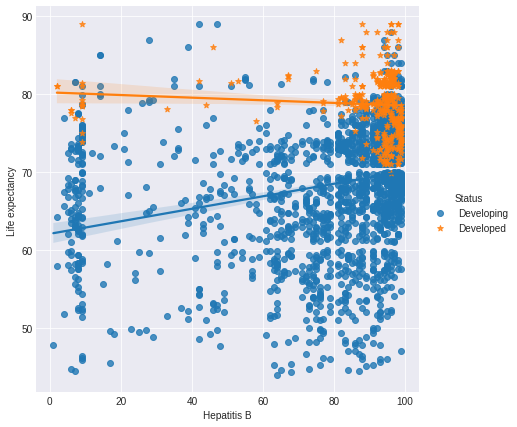

In [ ]:
plt.figure(figsize=(50,30))
sns.pairplot(life_expectancy, x_vars=['Hepatitis B'], y_vars=['Life expectancy '], hue='Status',markers=["o", "*"], height=6, kind="reg");

          Life expectancy value is having negative slope in case of developed countries whereas in case of Developed countries the life expectancy value is gradually rising which means that developing countries are taking measures for setting up vaccine of hepatitis B

<Figure size 3600x2160 with 0 Axes>

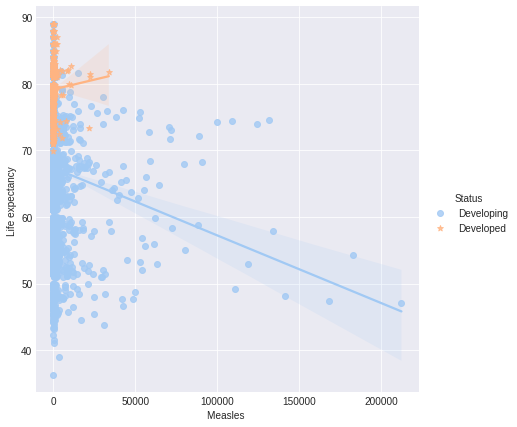

In [ ]:
plt.figure(figsize=(50,30))
sns.pairplot(life_expectancy, x_vars=['Measles '], y_vars=['Life expectancy '], hue='Status',markers=["o", "*"], height=6, kind="reg",palette='pastel');

            The developed countries seems to tackle measles pretty well whereas developing countries life expectancy values is badly decreasing due to no proper handling of measles

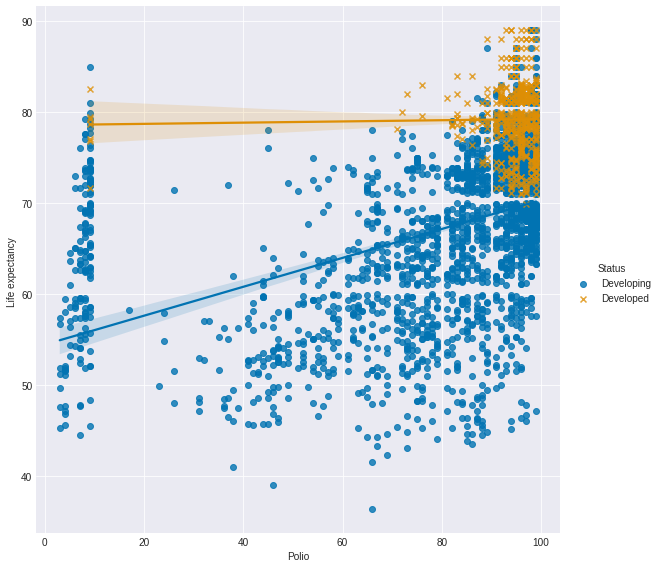

In [ ]:
sns.pairplot(life_expectancy, x_vars=['Polio'], y_vars=['Life expectancy '],hue='Status',markers=["o", "x"], height=8, kind="reg",palette='colorblind');

        Developed countries seems to have successfully eradicated polio diesease whereas in developing countries is getting better in handling polio

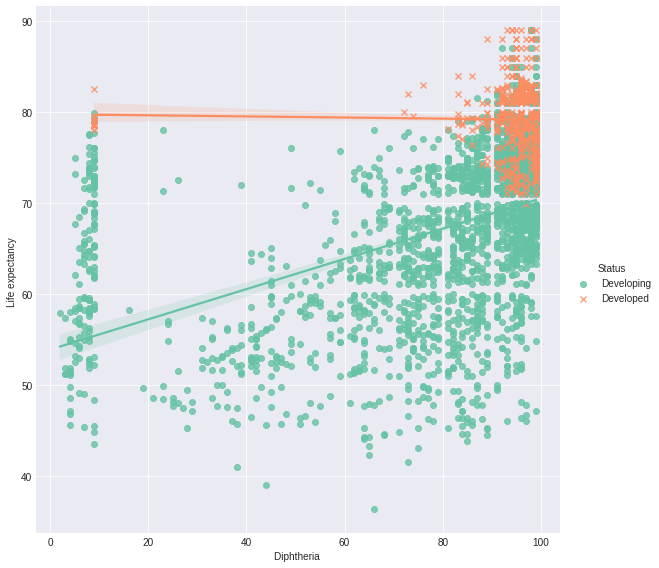

In [ ]:
sns.pairplot(life_expectancy, x_vars=['Diphtheria '], y_vars=['Life expectancy '],hue='Status',markers=["o", "x"], height=8, kind="reg",palette='Set2');

            Developed countries seems to have successfully eradicated Diphtheria diesease whereas in developing countries is getting better in handling Diphtheria

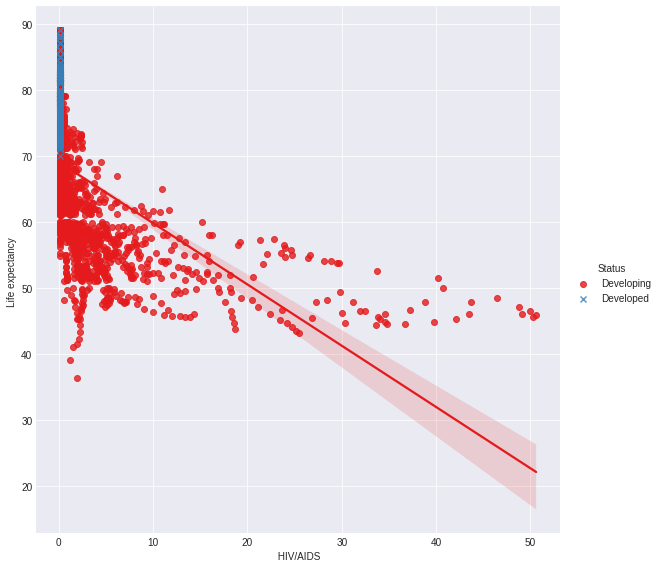

In [ ]:
sns.pairplot(life_expectancy, x_vars=[' HIV/AIDS'], y_vars=['Life expectancy '],hue='Status',markers=["o", "x"], height=8, kind="reg",palette='Set1');

         Developing countries are still not been able to handle hiv/aids cases which is decreasing life expectancy value at a rapid range

# Impact of schooling on life expectancy

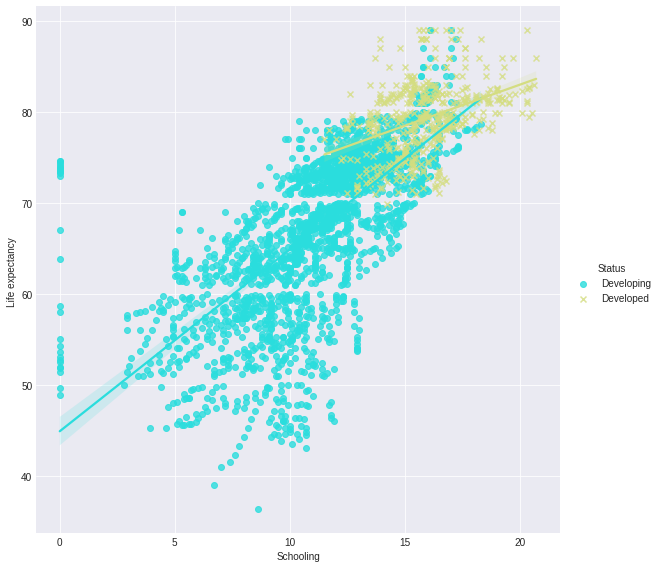

In [ ]:
sns.pairplot(life_expectancy, x_vars=['Schooling'], y_vars=['Life expectancy '],hue='Status',markers=["o", "x"], height=8, kind="reg",palette='rainbow');

          Education is found to be more established in developed countries than developing countries

# Impact of alcohol on life expectancy

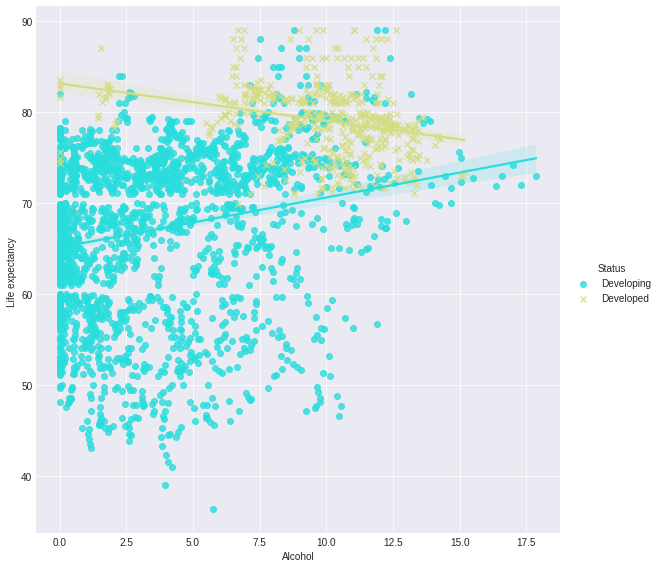

In [ ]:
sns.pairplot(life_expectancy, x_vars=['Alcohol'], y_vars=['Life expectancy '],hue='Status',markers=["o", "x"], height=8, kind="reg",palette='rainbow');

            Developing countries and alcohol have positive relation and developed countries and alcohol have negative relation

#**LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
life_expectancy['Country']= label_encoder.fit_transform(life_expectancy['Country'])
life_expectancy['Status']= label_encoder.fit_transform(life_expectancy['Status'])

In [ ]:
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#**Remove highly correlated features**

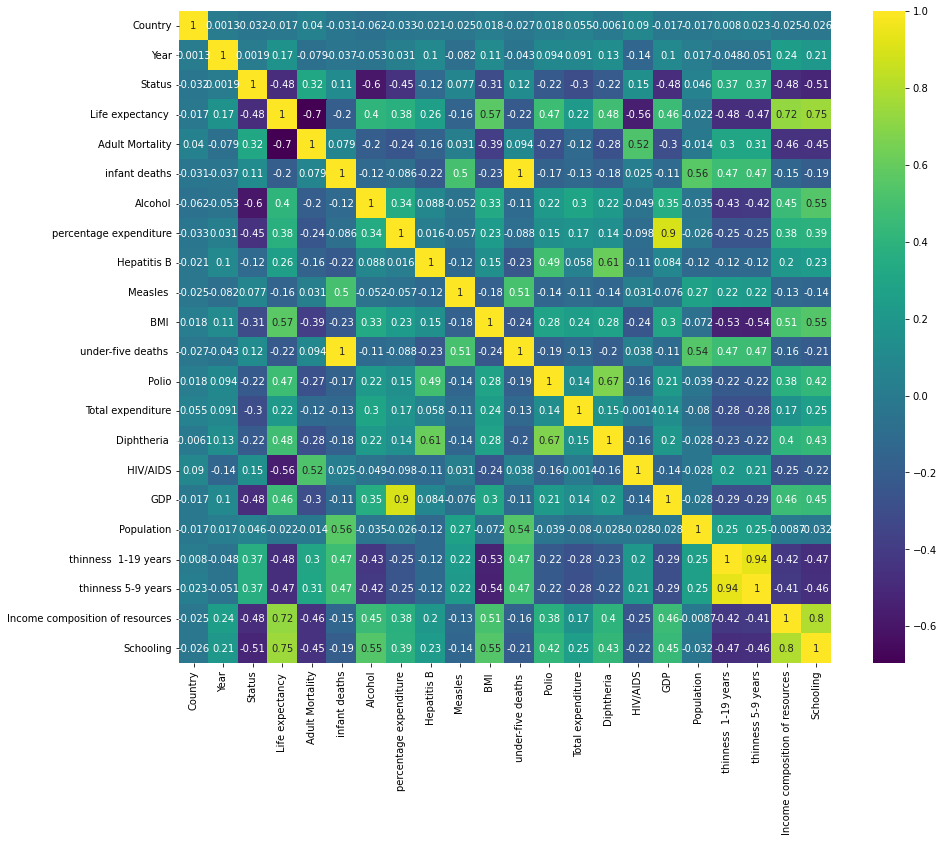

In [ ]:
correlation = life_expectancy.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation, square=True, annot=True, cmap='viridis');

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(life_expectancy, 0.9)
len(set(corr_features))

2

In [ ]:
life_expectancy.drop(corr_features,axis=1,inplace=True)

In [ ]:
life_expectancy.shape

(2938, 20)

#**TREATMENT OF MISSING VALUES**

In [ ]:
life_expectancy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
Skewness = 3 * (life_expectancy.mean() - life_expectancy.median()) / life_expectancy.std()

In [ ]:
for i in Skewness.index:
  if Skewness[i] <= 0.01 and Skewness[i] >= 0:
    life_expectancy[i]=life_expectancy[i].fillna(life_expectancy[i].mean())
  else:
    life_expectancy[i]=life_expectancy[i].fillna(life_expectancy[i].median())

In [ ]:
np.any(life_expectancy.isna())

False

#**Detecting outliers**

In [ ]:
from scipy import stats

In [ ]:
z_scores = stats.zscore(life_expectancy)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 4). all(axis=1)
life_expectancy = life_expectancy[filtered_entries]

In [ ]:
life_expectancy.shape

(2760, 20)

#EDA

In [ ]:
life_expectancy.loc[life_expectancy['Adult Mortality'] >= life_expectancy['Adult Mortality'].mean(),['Country','Year','Status']].max()

Country     192
Year       2015
Status        1
dtype: int64

out of 198 countries Zimbabwe constitutes to high number of averag eadult deaths in the year 2015

In [ ]:
life_expectancy.loc[life_expectancy['infant deaths'] >= life_expectancy['infant deaths'].mean(),['Country','Year','Status']].max()

Country     191
Year       2015
Status        1
dtype: int64

out of 198 countries Zambia constitutes to high number of average infant deaths in the year 2015

In [ ]:
life_expectancy.loc[life_expectancy['Measles '] >= life_expectancy['Measles '].mean(),['Country','Year','Status']].max()

Country     191
Year       2015
Status        1
dtype: int64

out of 198 countries Zimbabwe suffered high percentage of measles disease in the year 2015

In [ ]:
life_expectancy.loc[life_expectancy['percentage expenditure'] >= life_expectancy['percentage expenditure'].mean(),['Country','Year','Status']].max()

Country     185
Year       2014
Status        1
dtype: int64

out of 198 countries Uruguay contributed to average percentage expenditure 

In [ ]:
life_expectancy.loc[life_expectancy[' BMI '] >= life_expectancy[' BMI '].mean(),['Country','Year','Status']].max()

Country     190
Year       2015
Status        1
dtype: int64

Country Yemen contribued maximum average of BMI value

In [ ]:
life_expectancy.loc[life_expectancy['Hepatitis B'] >= life_expectancy['Hepatitis B'].mean(),['Country','Year','Status']].max()

Country     192
Year       2015
Status        1
dtype: int64

Country Zimbabwe suffered maximum average of Hepatitis B disease

In [ ]:
life_expectancy.loc[life_expectancy['Polio'] >= life_expectancy['Polio'].mean(),['Country','Year','Status']].max()

Country     192
Year       2015
Status        1
dtype: int64

Country Zimbabwe suffered maximum average of Polio disease

In [ ]:
life_expectancy.loc[life_expectancy['Total expenditure'] >= life_expectancy['Total expenditure'].mean(),['Country','Year','Status']].max()

Country     192
Year       2015
Status        1
dtype: int64

Country Zimbabwe had maximum average of Total expenditure

In [ ]:
life_expectancy.loc[life_expectancy['GDP'] >= life_expectancy['GDP'].mean(),['Country','Year','Status']].max()

Country     185
Year       2015
Status        1
dtype: int64

Average GDP value of Uruguay country is high

In [ ]:
life_expectancy.loc[life_expectancy['Population'] >= life_expectancy['Population'].mean(),['Country','Year','Status']].max()

Country     192
Year       2015
Status        1
dtype: int64

Zimbabwe had maximum average population in the year 2015

In [ ]:
group_df=life_expectancy.groupby(['Country','Year']).agg({'Life expectancy ':['min','max','mean'],'Adult Mortality':['min','max','mean'],'infant deaths':['min','max','mean'],'percentage expenditure':['min','max','mean'],'Hepatitis B':['min','max','mean'],'Measles ':['min','max','mean'],' BMI ':['min','max','mean'],'Polio':['min','max','mean'],'Diphtheria ':['min','max','mean']})

In [ ]:
group_df.head()

Life expectancy               ... Diphtheria             
                          min   max  mean  ...         min   max  mean
Country Year                               ...                        
0       2000             54.8  54.8  54.8  ...        24.0  24.0  24.0
        2001             55.3  55.3  55.3  ...        33.0  33.0  33.0
        2003             56.7  56.7  56.7  ...        41.0  41.0  41.0
        2004             57.0  57.0  57.0  ...         5.0   5.0   5.0
        2005             57.3  57.3  57.3  ...        58.0  58.0  58.0

[5 rows x 27 columns]

minimum , maximum and mean value is calculated for each country for each column

In [ ]:
mode=life_expectancy.mode()
mode.iloc[0]

Country                            3.400000e+01
Year                               2.009000e+03
Status                             1.000000e+00
Life expectancy                    7.300000e+01
Adult Mortality                    1.200000e+01
infant deaths                      0.000000e+00
Alcohol                            1.000000e-02
percentage expenditure             0.000000e+00
Hepatitis B                        9.200000e+01
Measles                            0.000000e+00
 BMI                               4.350000e+01
Polio                              9.900000e+01
Total expenditure                  5.755000e+00
Diphtheria                         9.900000e+01
 HIV/AIDS                          1.000000e-01
GDP                                1.766948e+03
Population                         1.386542e+06
 thinness  1-19 years              3.300000e+00
Income composition of resources    6.770000e-01
Schooling                          1.230000e+01
Name: 0, dtype: float64

mode for each column

In [ ]:
life_expectancy.loc[(life_expectancy[' HIV/AIDS'] > life_expectancy[' HIV/AIDS'].mean()) & (life_expectancy['Diphtheria '] > life_expectancy['Diphtheria '].mean()) & (life_expectancy['Hepatitis B']> life_expectancy['Hepatitis B'].mean()) & (life_expectancy['Polio']> life_expectancy['Polio'].mean()) & (life_expectancy['Measles '] > life_expectancy['Measles '].mean()),['Country','Year','Status']].max()

Country     191
Year       2011
Status        1
dtype: int64

Country Tanzania suffered maximum average of all diseases(polio,hepatitis b,measles,diptheria,hiv/aids)

In [ ]:
life_expectancy.loc[(life_expectancy['percentage expenditure'] > life_expectancy['percentage expenditure'].mean()) & (life_expectancy['Total expenditure'] > life_expectancy['Total expenditure'].mean()),['Country','Year','Status']].max()

Country     185
Year       2014
Status        1
dtype: int64

in terms of expenditure Country Uruguay spent maximum average money out of 198 countries

In [ ]:
life_expectancy.loc[life_expectancy['Life expectancy '] == life_expectancy['Life expectancy '].max(),['Country','Year','Status']].max()

Country     165
Year       2014
Status        1
dtype: int64

In [ ]:
life_expectancy.loc[life_expectancy['Life expectancy '] == life_expectancy['Life expectancy '].min(),['Country','Year','Status']].max()

Country      72
Year       2010
Status        1
dtype: int64

In [ ]:
min_life=life_expectancy1.loc[life_expectancy1['Country'] == 'Japan','Life expectancy '].min()

Country Haiti had lowest life expectancy

#**TRAIN TEST SPLIT**


In [ ]:
X = life_expectancy.drop(labels=['Life expectancy '],axis=1)
Y = life_expectancy['Life expectancy ']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
(X_train.shape,X_test.shape)

((1932, 19), (828, 19))

#**FEATURE SELECTION**

#PERFORMANCE OF MODEL BEFORE FEATURE SELECTION

In [ ]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train,Y_train)
y_pred_1 = model_1.predict(X_test)

In [ ]:
acc = model_1.score(X_test,Y_test)
acc

0.8021891229444442

#PERFORMANCE OF MODEL AFTER FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
sel_top = SelectPercentile(mutual_info_regression,percentile=90)
sel_top.fit(X_train,Y_train)
sel = X_train.columns[sel_top.get_support()]
sel

Index(['Country', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', ' BMI ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', 'Income composition of resources',
       'Schooling'],
      dtype='object')

In [ ]:
final_columns=[column for column in X_train.columns if column not in sel]
final_columns

['Year', 'Measles ']

In [ ]:
X_train.drop(final_columns,axis=1,inplace=True)

In [ ]:
X_test.drop(final_columns,axis=1,inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()
model_2.fit(X_train,Y_train)
y_pred_2 = model_2.predict(X_test)

In [ ]:
acc = model_2.score(X_test,Y_test)
acc

0.8037468216533048

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
sel_top = SelectPercentile(mutual_info_regression,percentile=70)
sel_top.fit(X_train,Y_train)
sel = X_train.columns[sel_top.get_support()]
sel

Index(['Country', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', ' BMI ', 'Polio', 'Diphtheria ', ' HIV/AIDS',
       'GDP', ' thinness  1-19 years', 'Income composition of resources',
       'Schooling'],
      dtype='object')

In [ ]:
final_columns=[column for column in X_train.columns if column not in sel]
final_columns

['Year',
 'Status',
 'Hepatitis B',
 'Measles ',
 'Total expenditure',
 'Population']

In [ ]:
X_train.drop(final_columns,axis=1,inplace=True)

In [ ]:
X_test.drop(final_columns,axis=1,inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()
model_2.fit(X_train,Y_train)
y_pred_2 = model_2.predict(X_test)

In [ ]:
acc = model_2.score(X_test,Y_test)
acc

0.8019092551429569

#**CONFIDENCE INTERVALS**

#Confidence Intervals for population mean of target - life expectancy

In [ ]:
life_expectancy['Life expectancy '].mean()

69.55083333333339

In [ ]:
sampledata = life_expectancy['Life expectancy '].sample(100)

In [ ]:
import scipy.stats as st

In [ ]:
st.t.interval(alpha=0.90,df=len(sampledata)-1,loc=np.mean(sampledata),scale=st.sem(sampledata))

(69.13553439301076, 71.94846560698927)

In [ ]:
st.t.interval(alpha=0.95,df=len(sampledata)-1,loc=np.mean(sampledata),scale=st.sem(sampledata))

(68.86123165272024, 72.2227683472798)

In [ ]:
st.t.interval(alpha=0.99,df=len(sampledata)-1,loc=np.mean(sampledata),scale=st.sem(sampledata))

(68.31725378217403, 72.766746217826)

#Confidence Intervals for population std of target - life expectancy

In [ ]:
life_expectancy['Life expectancy '].std()

9.02236996973225

In [ ]:
sampledata = life_expectancy['Life expectancy '].sample(100)

In [ ]:
st.t.interval(alpha=0.90,df=len(sampledata)-1,loc=np.std(sampledata),scale=st.sem(sampledata))

(7.646717516742073, 10.71000670083008)

In [ ]:
st.t.interval(alpha=0.95,df=len(sampledata)-1,loc=np.std(sampledata),scale=st.sem(sampledata))

(7.348001140983547, 11.008723076588607)

In [ ]:
st.t.interval(alpha=0.99,df=len(sampledata)-1,loc=np.std(sampledata),scale=st.sem(sampledata))

(6.755607868461769, 11.601116349110384)

#**HYPOTHESIS TESTING**



In [ ]:
sample = life_expectancy['Life expectancy '].sample(500)
n = 500
degrees_of_freedom=n-1
xbar = sample.mean()   #sample
mu = life_expectancy['Life expectancy '].mean()
sigma = life_expectancy['Life expectancy '].std()
s=sample.std()
alpha = 0.01
print(xbar,mu)

69.05700000000004 69.55083333333339


#z test

In [ ]:
#H0 : μ = 69.5 , H1 : μ <69.5 left tailed test
z_critical=st.norm.ppf(alpha)     
print(z_critical)
z=(xbar-mu)/(sigma/np.sqrt(n))
z

-2.3263478740408408


-1.2238967218071584

In [ ]:
if (z < z_critical):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


THERE IS ENOUGH EVIDENCE TO SUPPORT THE CLAIM THAT LIFE EXPECTANCY OF SAMPLE IS LESSER THAN POPULATION.

#z test using p val

In [ ]:
z_critical=st.norm.ppf(alpha)           #two tailed test H0 : μ = 69.5 , H1 : μ !=69.5 two tailed test
print(z_critical)
p_val=(1-st.norm.cdf(z))*2
p_val


-2.3263478740408408


1.779008809561552

In [ ]:
if (p_val > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


THERE IS NO ENOUGH EVIDENCE TO SUPPORT THE CLAIM THAT THE AVERAGE OF LIFE EXPECTANCY IS 72.5.

# t test

In [ ]:
t=(xbar - mu)/(s/np.sqrt(n))          #H0 : μ = 69.5 , H1 : μ <69.5 left tailed test
t
t_critical = st.t.ppf(alpha,degrees_of_freedom)
t_critical

-2.3338439936572817

In [ ]:
if (t > t_critical):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


THERE IS NO ENOUGH EVIDENCE TO SUPPORT THE CLAIM THAT LIFE EXPECTANCY OF SAMPLE MEAN IS LESSER THAN POPULATION MEAN

#t test using p val

In [ ]:
t=(xbar - mu)/(s/np.sqrt(n))    #H0 : μ = 69.5 , H1 : μ >69.5 right tailed test
t
p_val=1-st.t.cdf(t,degrees_of_freedom)
p_val

0.8845626014354713

In [ ]:
if (p_val > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


THERE IS NO ENOUGH EVIDENCE TO SUPPORT THE CLAIM THAT LIFE EXPECTANCY OF SAMPLE IS GREATER THAN POPULATION.

#chi sq test

In [ ]:
#H0 : σ^2 = 81.4 , H1 : σ^2 < 81.4
n = 500
degrees_of_freedom = n-1
s_square = life_expectancy['Life expectancy '].sample(500).var()            #sample variance
sigma_square = life_expectancy['Life expectancy '].var()        #pop variance
alpha = 0.01
print(s_square,sigma_square)

80.97553551102196 81.40315987072633


In [ ]:
chi_sq=st.chi2.ppf(alpha,degrees_of_freedom)
chi_sq

428.46115588529887

In [ ]:
chi=((n-1)*s_square)/(sigma_square)
chi

496.37866987189017

In [ ]:
if (chi > chi_sq):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


THERE IS NO ENOUGH EVIDENCE TO SUPPORT THE CLAIM THAT LIFE EXPECTANCY OF SAMPLE IS LESSER THAN POPULATION.

#chi sq using p value

In [ ]:
chi=((n-1)*s_square)/(sigma_square)             #two tailed test H0 : σ = 81.4 , H1 : σ =! 81.4
chi
p_val=st.chi2.cdf(chi,degrees_of_freedom)*2
p_val

0.9505562596957793

In [ ]:
if (chi > p_val):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


THERE IS NO ENOUGH EVIDENCE TO SUPPORT THE CLAIM THAT AVERAGE OF LIFE EXPECTANCY IS 32.8

#**MODELS**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

def predictive_models():
    algorithms = [SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
                  RandomForestRegressor(n_estimators = 100, random_state = 0)]
    algorithm_names = ["SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]
    Mean_Squared_Error_Training = []
    Mean_Absolute_Error_Training = []
    Mean_Squared_Error_Testing = []
    Mean_Absolute_Error_Testing = []
    Accuracy_Testing = []
    
    for i in algorithms:
        model = i
        model.fit(X_train,Y_train)
    
        y_test_predict = model.predict(X_test)
        y_train_predict = model.predict(X_train)
        Accuracy_Testing.append(model.score(X_test,Y_test))   
        mse_1 = round(mean_squared_error(Y_train, y_train_predict),4)
        mae_1 = round(mean_absolute_error(Y_train, y_train_predict),4)
        
        mse_2 = round(mean_squared_error(Y_test, y_test_predict),4)
        mae_2 = round(mean_absolute_error(Y_test, y_test_predict),4)
        
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Training.append(mse_1)
        Mean_Absolute_Error_Training.append(mae_1)
                
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Testing.append(mse_2)
        Mean_Absolute_Error_Testing.append(mae_2)
        
    # Creating DataFrame for Logs of Models and their errors    
    results = pd.DataFrame({"Models":algorithm_names,
                            "Accuracy":Accuracy_Testing,
                            "Mean Squared Error Training":Mean_Squared_Error_Training,
                            "Mean Absolute Error Training":Mean_Absolute_Error_Training,      
                            "Mean Squared Error Testing":Mean_Squared_Error_Testing,
                            "Mean Absolute Error Testing":Mean_Absolute_Error_Testing})

    return results

In [ ]:
results = predictive_models()
results

,Models,Accuracy,Mean Squared Error Training,Mean Absolute Error Training,Mean Squared Error Testing,Mean Absolute Error Testing
0,SVR,0.311276,55.3348,5.6109,54.3339,5.6791
1,KNeighbors Regressor,0.731564,11.7837,2.3522,21.1771,3.1753
2,Decision-Tree Regressor,0.896073,0.0000,0.0000,8.1989,1.7289
3,Random-Forest Regressor,0.952028,0.5249,0.4421,3.7846,1.2185
